# Introduction to Integration 적분의 소개

적분은 미분읜 역함수 (inverse)
적분을 이용하면 임의의 함수의 곡선 아래의 영역의 면적으로 계산해준다.
적분의 사용범위는 다양하다.
예를들어 양극 간사이의~....
Integrals are the inverses of derivatives. More importantly, using integration provides a way to compute the area under the curve of most any function. There are many applications for integration. For example, if you need to compute a probability of some occurance between limits (which we'll discuss later in this course), then you will use an integral.

Let's start with a simple function:

$$f(x)=x$$

We can plot this function as a line. Run the code below to plot the function for the range 0 to 10:

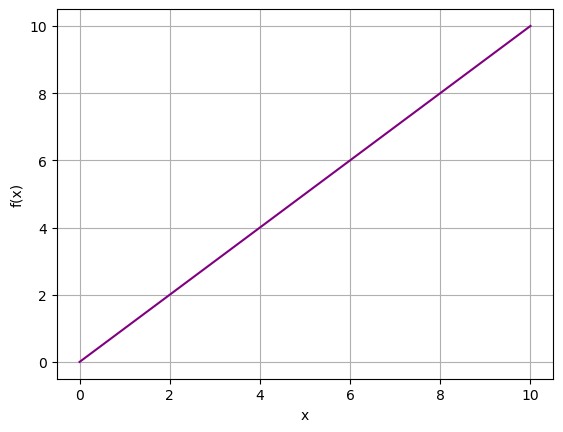

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Define function f
def f(x):
    return x

# Create an array of x values from 0 to 10
x = range(0, 11)

# Get the corresponding y values from the function
y = [f(a) for a in x]

# Set up the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot x against f(x)
plt.plot(x,y, color='purple')

plt.show()

$$
    \lim_{n \rightarrow \infty} (\sum_{k=1}^{n} f(a+k \frac{b-a}{n}))\frac{b-a}{n}
$$

$$
    \lim_{n \rightarrow \infty} \sum_{k=1}^{n} f(a+k \frac{b-a}{n})\frac{b-a}{n}
$$

In [2]:
def integrate_1(f,a,b,n=10000):
    delta_x=(b-a)/n
    result=0.0
    for k in range(1,n):
        x_k = a+k*delta_x
        result+=f(x_k) #함수값(높이)를 다 더하고 마지막으로 delta(밑변)을 곱한다
        #곱하는 횟수는 줄지만 정확도 떨어짐. 아주 작은값이므로 무시해도된다.
    result *= delta_x
    return result

In [3]:
def integrate_2(f,a,b,n=10000):
    delta_x=(b-a)/n
    result=0.0
    for k in range(1,n):
        x_k = a+k*delta_x
        result+=f(x_k)*delta_x #밑변과 높이를 곱하면 직사각형의 면적
    return result

In [4]:
integrate_1(lambda x:x**2,3,5)

32.66326668

In [9]:
nogada=integrate_2(lambda x:x**2,3,5)
nogada

32.66326668000007

In [7]:
def f(x): return x**2

In [8]:
import sympy as sp
x=sp.symbols('x')
abs(sp.integrate(f(x),(x,3,5))-nogada)<0.1

True

## Performing Integration 적분 수행

The *integral* of a function is the area under it - in this case, the area under the purple diagonal line down to the x-axis.

So how do you find the integral of a function? well, for our simple function $f(x) = x$, the formula for an integral is written as follows:

$$\int f(x)\;dx$$

The $\int$ symbol shows that this formula is an integral.<br>
The $dx$는 $x$ variable 로 적분 의미. <br>
$dx$ = $\lim_{\Delta x \rightarrow 0}$<br>
Note that since $f(x) = x$, we could also write this integral formula as $\int x\;dx$

So, what  is the integral of $x\ dx$? <br>
To answer this question, we need the *antiderivative* of ***f*** - in other words $f$의 출력과 일치하는 미분을 가지는 함수를 찾을 필요가 있다.<br>
which is just $x$. Using the power rule in reverse, $x$의 미분이 $\frac{1}{2} x^2$를 만족하는 함수

So, *unbound* 는 적분구간이 있는 적분 정적분 $x$
$$\int f(x)\;dx = \frac{1}{2} x^2$$
$$\int x^{n} dx = \frac {x^{n+1}}{n+1}$$

## Integration between Limits

Now that we have the unbound integral formula, we can use it to find the integral between specific start and end points. Let's suppose we want to find the area under the function between the $x$ values 0 and 2. In other words, the *integral* of $f$ for the range 0 to 2 with respect to $x$.

Run the following code to re-plot the function and show the area we're interested in:

In [ ]:
# Set up the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot x against f(x)
plt.plot(x,y, color='purple')

# show area for integral
section = np.arange(0, 2, 1/20)
plt.fill_between(section,f(section), color='orange')

plt.show()

We call the start and end point the **limits** of the integral. The lower limit is placed as a subscript of the integral sign. The upper limit is placed as a superscript of the integral sign. Using this notation the integral of $f(x)$ from $0$ to $2$ is written as follows:

$$\int_0^2 f(x)\;dx$$

The integral is evaluated by subtracting the value of the integrand at the lower limit from the integrand at the upper limit; and since we know the formula based on our antiderivative function, the integral can be evaluated in the following manner.

$$\int_0^2 f(x)\;dx\\ = \frac{1}{2} x^2\ \big|_0^2\\
= \frac{1}{2} 2^2 - \frac{1}{2} 0^2\\
= \frac{4}{2} - \frac{0}{2} x^2\\ = 2$$

Execute the code in the cell below and verify that the result returned by the ***scipy.integrate.quad*** function in Python is approximately the same as we computed analytically. 

$$ \int_{2}^{4}(3x^3+6x^2+7)dx $$

In [12]:
fn=lambda x: 3*x**3+6*x**2+7
inte1=integrate_1(fn,2,4,n=10000)
inte1

305.9650004399995

In [16]:
def f(x): return 3*x**3+6*x**2+7
print(sp.integrate(f(x),(x,2,4)))
abs(sp.integrate(f(x),(x,2,4))-inte1)<0.1


306


True

In [24]:
import numpy as np
fns=[lambda x:x**2+6*x**2,lambda x:np.cos(x),lambda x:np.sin(x)*x**2,lambda x:np.sin(x)*x*np.cos(x)]

intg_list=[]
for fn in fns:
    intg_list.append(integrate_1(fn,2,4,n=10000))
intg_list

[130.6526667600004,
 -1.6659929375342044,
 -1.3720455473658464,
 0.03682613004631912]

In [ ]:
import scipy.integrate as integrate
i, e = integrate.quad(lambda x: f(x), 0, 2)
print (i)

## Another Integral

Here is another example for a slightly more complex function. What is the area under the curve of the function $3x^2 + 2x + 1$ between $0$ and $3$?

let's look at that function and the area in question:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

# Define function g
def g(x):
    return 3 * x**2 + 2 * x + 1

# Create an array of x values from 0 to 10
x = range(0, 11)

# Get the corresponding y values from the function
y = [g(a) for a in x]

# Set up the plot
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot x against g(x)
plt.plot(x,y, color='purple')

# Make the shaded region
ix = np.linspace(0, 3)
iy = g(ix)
verts = [(0, 0)] + list(zip(ix, iy)) + [(3, 0)]
poly = Polygon(verts, facecolor='orange')
ax.add_patch(poly)

plt.show()

We can evaluate this integral just as before, this time using function:

$$\int_0^3 3x^2 + 2x + 1\;dx$$ 

We can calculate the antiderivative of $3x^2 + 2x + 1\;dx$ as $\frac{3}{3} x^3 + \frac{2}{2} x^2 + x$, so:

$$\int_0^3= \frac{3}{3} x^3 + \frac{2}{2} x^2 + x\ \big|_0^3\\
= \frac{3}{3} 3^3 + \frac{2}{2} 3^2 + 3 - \frac{3}{3} 0^3 - \frac{2}{2} 0^2 + 0\\
= 27 + 9 + 3 + 0 + 0 + 0\\
= 39$$

Now, execute the code in the cell below to verify the result:

In [ ]:
i, e = integrate.quad(lambda x: 3 * x**2 + 2 * x + 1, 0, 3)
print(i)

Note that the result from the ***scipy.integrate.quad*** function is approximate - the function actually returns an estimated integral (*i* in this case) and also a measure of absolute error (*e*). Run the following code to see what the absolute error was in this case:

In [ ]:
print(e)

The absolute error in this case is extremely small (around $4.3 \times 10^{-13}$).

## Infinite limits

In many cases the limits of an integral can be $+/- \infty$. Perhaps suprisingly, this situation is not really a problem if the function being integrated converges to $0$ at the infinite limit. 

Here is an example. The function $e^{-5x} \rightarrow 0$ as $x \rightarrow \infty$. Therefore, the integral of this function from some limit to $\infty$. This integral can be written as follows:

$$\int^{\infty}_0 e^{-5x} dx$$

The code in the cell below computes this integral numerically.

In [ ]:
import numpy as np
i, e = integrate.quad(lambda x: np.exp(-x*5), 0, np.inf)

print('Integral: ' + str(i))
print('Absolute Error: ' + str(e))

This integral converges to a small number with a much smaller error estimate. 

Here is another example that illustrates why having infinite integration limits is so useful. When computing probabilities it is often necessary to have infinite limits. Don't worry too much about the details of probability theory. This is covered in a later lesson. 

A Normal distribution with zero mean and a standard deviation of $1$ has the following density function:

$$\frac{1}{2 \pi} e^{\frac{-x^2}{\sqrt(2 \pi)}}$$

It makes sense that the integral of this probability density function from $-\infty$ to $\infty$ must be $1.0$. In other words the probability of a Normally distributed event ocurring at all possible values must be $1.0$. 

The code in the cell below computes the following integral:

$$\int_{-\infty}^{\infty} \frac{1}{2 \pi} e^{\frac{-x^2}{\sqrt(2 \pi)}} dx$$

Execute this code and verify that the result is approximately $1.0$.

In [ ]:
import numpy as np
norms = lambda x: np.exp(-x**2/2.0)/np.sqrt(2.0 * 3.14159)
i, e = integrate.quad(norms, -np.inf, np.inf)

print('Integral: ' + str(i))
print('Absolute Error: ' + str(e))